## Assignment One:##

-------------------
### Background:###
In probability and statistics, ***Student's t-distribution*** (or simply the t-distribution) is any member of a family of continuous probability distributions that arise when estimating the mean of a normally-distributed population in situations where the sample size is small and the population's standard deviation is unknown.

Applications:
- Student's t-test for assessing the statistical significance of the difference between 2 sample means
- construction of confidence intervals for the difference between two population means
- linear regression analysis
- bayesian analysis of data from a normal family

Shape:
- symmetric and bell-shaped, like the normal distribution
- but has heavier tails, meaning that it is more prone to producing values that fall far from its mean. 
- useful for understanding the statistical behavior of certain types of ratios of random quantities, in which variation in the denominator is amplified and may produce outlying values when the denominator of the ratio falls close to zero. 

Monte Carlo sampling:
- There are various approaches to constructing random samples from the Student's t-distribution.
- The matter depends on whether the samples are required on a stand-alone basis, or are to be constructed by application of a quantile function to uniform samples; e.g., in the multi-dimensional applications basis of ***copula-dependency***. 
- In the case of stand-alone sampling, an extension of the ***Box–Muller method*** and its polar form is easily deployed. It has the merit that it applies equally well to all real positive degrees of freedom, $\nu$, while many other candidate methods fail if  $\nu$ is close to zero.

-------------------

### Tasks:###

Very often, we get a sample of data set, and need to decide whether the data sample is following Student T distribution or not. In this project, you will be asked to develop two programs. 
- The first program is used to generate a data sample that follows Student T distribution. 
- The second program is used to verify the data sample generated by the first program is indeed following Student T distribution.

You also need to write a report to explain how your code is designed and what tests you have done to verify the code is correct. Submitting only source code without a report will not be accepted.

-------------------


## My attampt:##

### How Student T distribution arises from sampling?

Let $X_1,...,X_n$ be independently and identically drawn from the distribution $N(\mu ,\sigma ^{2})$, i.e. this is a sample of size $n$ from a normally distributed population with expected mean value $\mu$  and variance $\sigma ^{2}$.
Let

$$\bar{X}= \frac{1}{n}\sum_{i=1}^{n}X_{i}$$
be the sample mean and let

$$S^{2}=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$
be the (Bessel-corrected) sample variance. Then the random variable

$$\frac{\bar{X}-\mu}{\sigma /{\sqrt{n}}}$$
has a standard normal distribution (i.e. normal with expected mean 0 and variance 1), and the random variable:

$$t = \frac{\bar{X}-\mu}{S /{\sqrt{n}}}$$
where $S$ has been substituted for $\sigma$, has a Student's t-distribution with $n-1$ degrees of freedom. The numerator and the denominator in the preceding expression are independent random variables despite being based on the same sample $X_1,...,X_n$.

#### Generating from Sampling Distribution:
Let $x_1,...,x_n$ be the numbers observed in a sample from a continuously distributed population with expected value $\mu$.

The sample mean:
$$\bar{x} = \frac{x_1+...+x_n}{n}$$
The sample variance:
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\bar{x})^2}$$
The resulting t-value is
$$t = \frac{\bar{x}-\mu}{s/ \sqrt{n}}$$
The t-distribution with $n-1$ degrees of freedom is the sampling distribution of the t-value when the samples consist of i.i.d. observations from a normally distributed population. 

Thus, for inference purposes, $t$ is a useful "pivotal quantity" in the case when the mean and variance $(\mu ,\sigma ^{2})$ are unknown population parameters, in the sense that the t-value has then a probability distribution that depends on neither $\mu$  nor $\sigma ^{2}$.


### Coding:###
I tried generating Student's t-distributed random numbers with degrees of freedom = 3. 

I also generated these numbers using numpy's in-built random number generator for t-distribution. 

The following figure shows five sample histograms for each case: manual (Wikipedia) generation (upper row) and python's in-built generation (lower row). Green curves are analytical distribution.

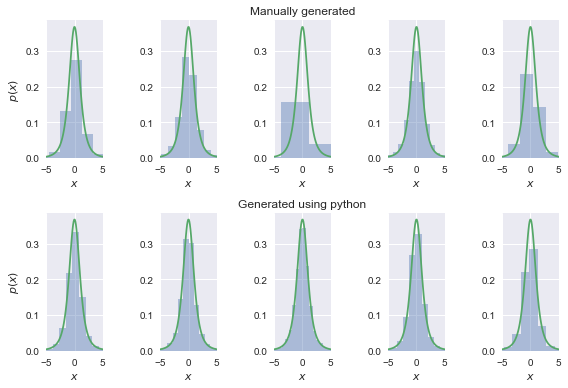

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
from scipy.stats import t

"""Generate t distributed values"""
def f(x, mu):
    n = len(x)
    return np.sqrt(n) * (x.mean()-mu)/ x.std()

mu = 0
df = 3

for i in range(5):
    plt.subplot(2,5,i+1)
    t_vals = [f(np.random.normal(loc = mu, size = df + 1), mu) for i in range(10000)]
    sns.distplot(t_vals, kde = False, norm_hist = True)
    x = np.linspace(-5, 5, 100)
    plt.plot(x, t.pdf(x, df))
    plt.xlim([-5, 5])
    plt.xlabel(r"$x$")
    if i == 0:
        plt.ylabel(r"$p(x)$")
    if i == 2:
        plt.title("Manually generated")

for i in range(5):
    plt.subplot(2,5,i+6)
    t_vals = np.random.standard_t(df, size = 10000)
    sns.distplot(t_vals, kde = False, norm_hist = True)
    x = np.linspace(-5, 5, 100)
    plt.plot(x, t.pdf(x, df))
    plt.xlim([-5, 5])
    plt.xlabel(r"$x$")
    if i == 0:
        plt.ylabel(r"$p(x)$")
    if i == 2:
        plt.title("Generated using python")

plt.tight_layout()
# plt.savefig("t_dists.pdf", bboxinches = "tight")

### Issues:###

I feel that around x=0, there is some issue since the numbers that I generated using the Wikipedia prescription don't align well with the analytical form of the distribution. 

#### Possible Reason 1: Bin Width

There does not appear to be any appreciable difference between the theoretical density and the histograms you produce. Use (much) narrower bins to check. Also, narrow down that bins used for the histograms in the top row as well.

#### Follow-up 1:

In both cases, I am using ***Freedman-Diaconis rule*** and so there is essentially no problem about binning. This is automated in seaborn. 

In statistics, the Freedman–Diaconis rule can be used to select the width of the bins to be used in a histogram.

For a set of empirical measurements sampled from some probability distribution, the Freedman-Diaconis rule is designed to minimize the difference between the area under the empirical probability distribution and the area under the theoretical probability distribution.

The general equation for the rule is:

$$\text{Bin width} = 2 \frac{\text{IQR}(x)}{\sqrt[{3}]{n}}$$
where $\text{IQR}(x)$ is the interquartile range of the data and $n$ is the number of observations in the sample $x$.

#### Follow-up 2:
There is a problem with binning (they are not sufficiently narrow). If I wish to stick to that rule then generate more samples.


### Possible Reason 2: ``NumPy``
The reason is much more mundane: it just happens that ``NumPy`` does not define the standard variance in the standard (Gosset's) way! Indeed it uses instead:

The sample variance:
$$s^2 = \frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^2}$$

which leads to a t distribution inflated by $\sqrt{\frac{n}{n-1}}$

-------------------------------------------------
### How to test whether data follows t-distribution?

- t-test
- Kolmogorov-Smirnoff
- QQ-plot
-----------------------------------------------------
### t-test:
The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

    A very simple example: 

Let’s say you have a cold and you try a naturalistic remedy. Your cold lasts a couple of days. The next time you have a cold, you buy an over-the-counter pharmaceutical and the cold lasts a week. You survey your friends and they all tell you that their colds were of a shorter duration (an average of 3 days) when they took the homeopathic remedy. What you really want to know is, are these results repeatable? A t test can tell you by comparing the means of the two groups and letting you know the probability of those results happening by chance.

    Another example: 

Student’s T-tests can be used in real life to compare means. For example, a drug company may want to test a new cancer drug to find out if it improves life expectancy. In an experiment, there’s always a control group (a group who are given a placebo, or “sugar pill”). The control group may show an average life expectancy of +5 years, while the group taking the new drug might have a life expectancy of +6 years. It would seem that the drug might work. But it could be due to a fluke. To test this, researchers would use a Student’s t-test to find out if the results are repeatable for an entire population.

    What is t-score?

The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.
A large t-score tells you that the groups are different.
A small t-score tells you that the groups are similar.

    What are T-Values and P-values?

How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

    Types of t-tests?
    1. An Independent Samples t-test compares the means for two groups.
    2. A Paired sample t-test compares means from the same group at different times 
    (say, one year apart).
    3. A One sample t-test tests the mean of a single group against a known mean.

#### How to perform a 2 sample t-test?

Lets us say we have to test whether the height of men in the population is different from height of women in general. So we take a sample from the population and use the t-test to see if the result is significant.

Steps:

1. Determine a null and alternate hypothesis.

In general, the null hypothesis will state that the two populations being tested have no statistically significant difference. The alternate hypothesis will state that there is one present. In this example we can say that:
    - Null: height men = height women
    - Alter: not equal

2. Collect sample data

Next step is to collect data for each population group. In our example we will collect 2 sets of data, one with the height of women and one with the height of men. The sample size should ideally be the same but it can be different. Lets say that the sample sizes are nx and ny.

3. Determine a confidence interval and degrees of freedom

This is what we call alpha ($\alpha$). The typical value of α is 0.05. This means that there is 95% confidence that the conclusion of this test will be valid. The degree of freedom can be calculated by the the following formula: $$\text{df} = n_x + n_y -2$$

4. Calculate the t-statistic
$$t = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}}$$
$$\bar{X} = \frac{\sum_{i=1}^{n_x}{x_i}}{n_x}$$
$$s_x^2 = \frac{\sum_{i=1}^{n_x}{(x_i-\bar{X})^2}}{n_x-1}$$

5. Obtain critical t-value from the t distribution

We need 2 things, the chosen value of $\alpha$ and the degrees of freedom $\nu$. Use the table. In python,rather than looking up in the table we will use a function from the sciPy package. 

6. Compare the critical t-values with the calculated t statistic

- t-statistic > critical t-value, or p <= $\alpha$, you ***reject the null*** hypothesis. The test concludes that there is a statistically significant difference between the two populations. 

- t-statistic < critical t-value, or p > $\alpha$, you ***fails to reject the null*** hypothesis and accept the alternate hypothesis which says there is no statistically significant difference between the two populations. 

### Coding:


In [3]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 7.302237989745796
p = 8.765258894261052e-07
t = 7.302237989745796
p = 8.765258893921977e-07


### Notes:

In working with the means of the samples, the test assumes that 
- both samples were drawn from a Gaussian distribution
- the samples have the same variance, and the same size

Of course, there are corrections to the test if these assumptions do not hold. For example, see Welch’s t-test.

``Scipy``

There are two main versions of Student’s t-test:

Both the independent and the dependent Student’s t-tests are available in Python via the ``ttest_ind()`` and ``ttest_rel()`` SciPy functions respectively.

- Independent Samples. The case where the two samples are unrelated.
- Dependent Samples. The case where the samples are related, such as repeated measures on the same population. Also called a paired test.


Note: I recommend using these SciPy functions to calculate the Student’s t-test for your applications, if they are suitable. The library implementations will be faster and less prone to bugs. I would only recommend implementing the test yourself for learning purposes or in the case where you require a modified version of the test.

We will use the SciPy functions to confirm the results from our own version of the tests.

#### Here is independent case:

First, let’s generate two samples of 100 Gaussian random numbers with the same variance of 5 and differing means of 50 and 51 respectively. We will expect the test to reject the null hypothesis and find a significant difference between the samples:


In [5]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-2.262, df=198, cv=1.653, p=0.025
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.



#### Here is dependent case:

This is the case where we collect some observations on a sample from the population, then apply some treatment, and then collect observations from the same sample.

The result is two samples of the same size where the observations in each sample are related or paired.The t-test for dependent samples is referred to as the paired Student’s t-test.

The data samples are not paired, but we will pretend they are. We expect the test to reject the null hypothesis and find a significant difference between the samples.

In [ ]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
 
# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# number of paired samples
	n = len(data1)
	# sum squared difference between observations
	d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
	# sum difference between observations
	d2 = sum([data1[i]-data2[i] for i in range(n)])
	# standard deviation of the difference between means
	sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
	# standard error of the difference between the means
	sed = sd / sqrt(n)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = n - 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples (pretend they are dependent)
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

-------------------------------------------
Kolmogorov-Smirnoff:

Here's how to run KS-test on t-distribution.

- Suppose you have a sample which you suspect is from t-distribution, and has size = n
- Estimate the t-distribution parameters from the sample.
- Generate M samples of size n from the estimated distribution.
- For each sample obtain KS statistics using the estimated distribution as theoretical
- Build empirical nonparametric distribution from obtained statistics, e.g. using kernel density estimators
- Obtain KS statistics for the original sample and the estimated distribution
- Obtain p-value for the KS-stat using the empirical distribution of statistics
- Make decision based on confidence level

Here is using ``Scipy``
[https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html]

In [7]:
import scipy.stats as ss
import numpy as np
np.random.seed(0)
data = [f(np.random.normal(loc = mu, size = df + 1), mu) for i in range(10000)]
ss.kstest(data, "t", args = (3, )) #df = 2

KstestResult(statistic=0.05320388958058002, pvalue=5.179441207021393e-25)

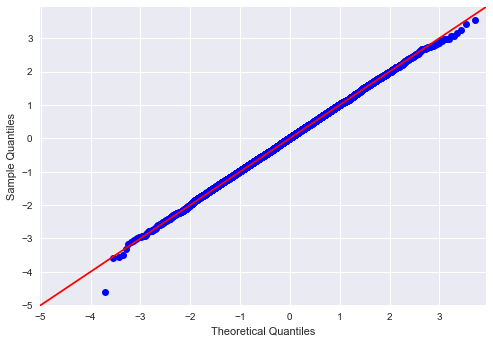

In [12]:
import numpy as np
import statsmodels.api as sm
import pylab

sm.qqplot(np.array(data), line='45')
pylab.show()

### Issues:

Unless we have prespecified the mean and variance before we see the data, a straight Kolmogorov-Smirnov test is not suitable - indeed once we estimate parameters it's no longer distribution free.

our p-values will be quite wrong - our actual significance level will be much lower than the nominal rate and power will be correspondingly low.

### Possible solution 1:

If we want to do a Kolmogorov-Smirnov-like test, you need the t-distribution version of a ``Lilliefors test`` (essentially, a K-S test with fitted parameters).

### Possible solution 2:
One might do better with an adapted version of a ``Shapiro-Francia type test``, based off the squared correlation between the observed values and approximate expected order statistics for a $t_N$ distribution. This will correspond directly to the correlation in a suitable Q-Q plot.

Distributions under the null can be simulated for either of the above tests.

### Possible solution 3:
Another alternative if sample sizes are not small is the ``Anderson-Darling test``. It has the same issue as the K-S but the impact seems to drop off relatively rapidly with sample size. See the discussion in D'Agostino and Stephens "Goodness of fit Techniques"

[If you have a specific alternative in mind, (one in which the $t_N$ might be a special case, such as testing against a t with a different df) you may be able to make a likelihood ratio statistic.]

There are tests for unimodality and symmetry, as well.